<a href="https://www.kaggle.com/code/utkarshx27/extramarital-affairs?scriptVersionId=128738115" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fairs-extramarital-affairs-data/Affairs.csv


In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/fairs-extramarital-affairs-data/Affairs.csv')
df.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


In [4]:
df.describe()

,Unnamed: 0,affairs,age,yearsmarried,religiousness,education,occupation,rating
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,1059.722130,1.455907,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780
std,914.904611,3.298758,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179
min,4.000000,0.000000,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000
25%,528.000000,0.000000,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000
50%,1009.000000,0.000000,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000
75%,1453.000000,0.000000,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000
max,9029.000000,12.000000,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000


In [5]:
df.isnull().sum()

Unnamed: 0       0
affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

In [6]:
yn_dict = {'yes': 1, 'no': 0}
df['children'] = df['children'].map(yn_dict)

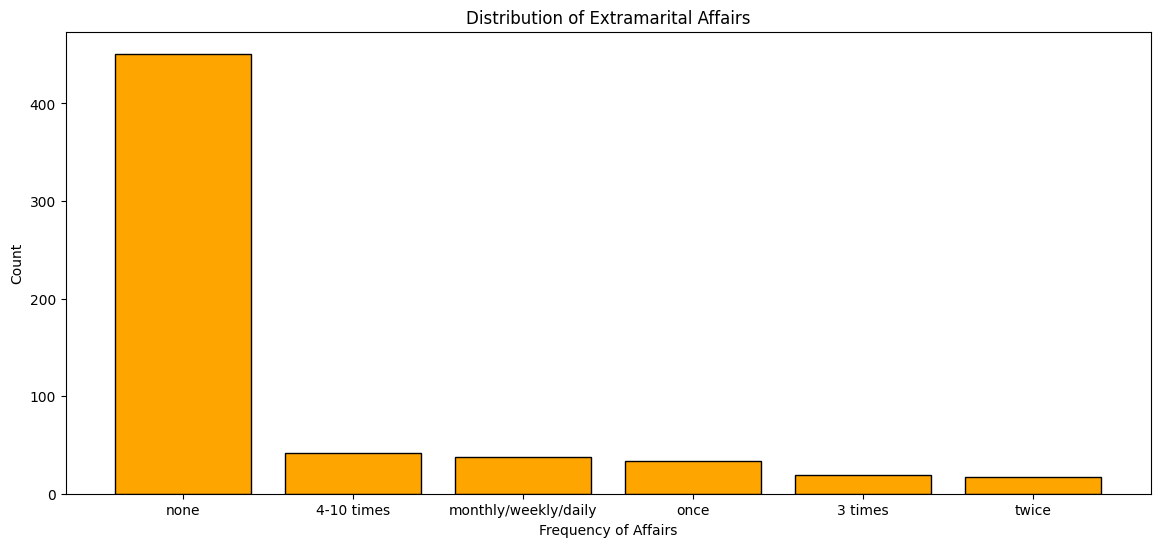

In [7]:
groups = {
    0: 'none',
    1: 'once',
    2: 'twice',
    3: '3 times',
    7: '4-10 times',
    12: 'monthly/weekly/daily'
}

grouped = df['affairs'].replace(groups).value_counts()
fig, ax = plt.subplots(figsize=(14, 6))
plt.bar(grouped.index, grouped.values, edgecolor='black', color='orange')
plt.title('Distribution of Extramarital Affairs')
plt.xlabel('Frequency of Affairs')
plt.ylabel('Count')
plt.show()


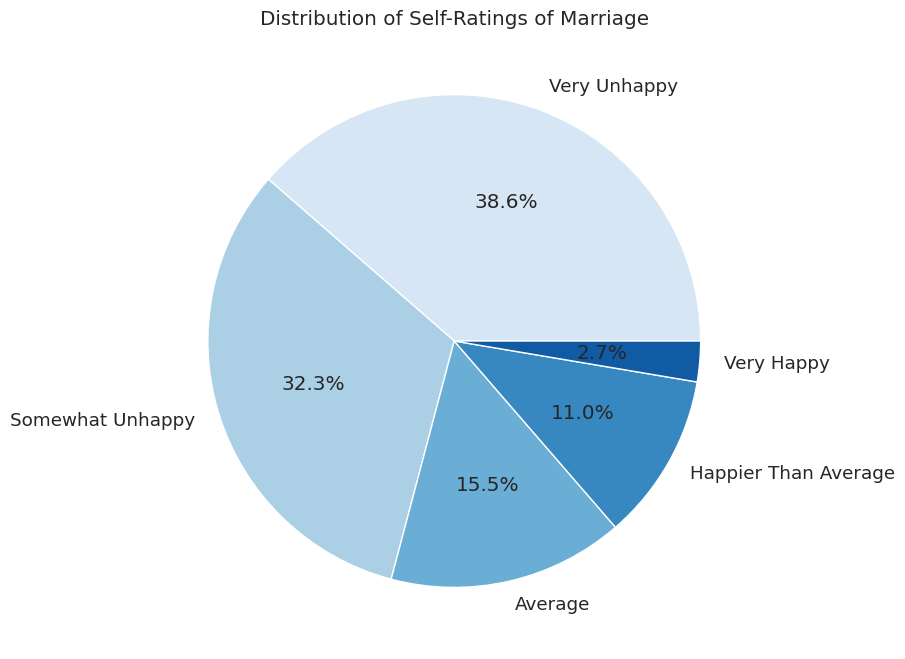

In [8]:
rating_counts = df['rating'].value_counts()

sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(rating_counts.values, labels=['Very Unhappy', 'Somewhat Unhappy', 'Average', 'Happier Than Average', 'Very Happy'], 
       autopct='%1.1f%%', colors=sns.color_palette('Blues', 5))
ax.set_title('Distribution of Self-Ratings of Marriage')
plt.show()

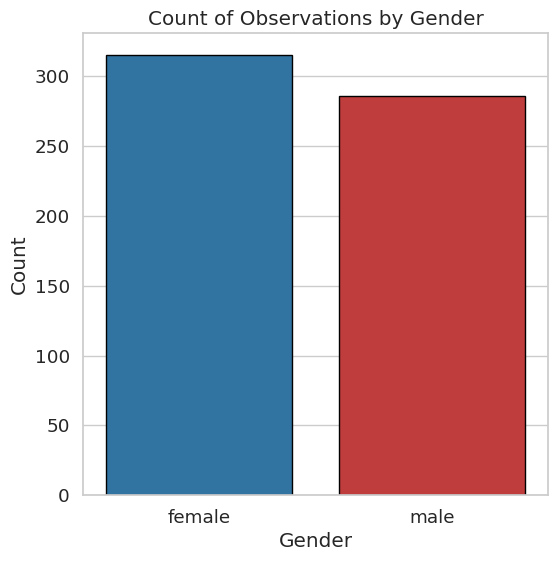

In [9]:
gender_counts = df['gender'].value_counts()
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, edgecolor='black', palette=['tab:blue', 'tab:red'])
plt.title('Count of Observations by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

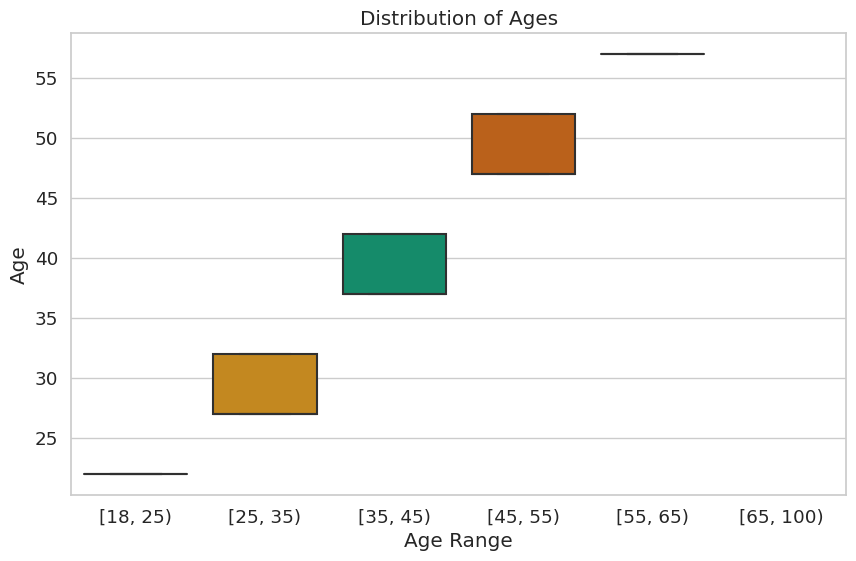

In [10]:
age_bins = [18, 25, 35, 45, 55, 65, 100]
age_groups = pd.cut(df['age'], bins=age_bins, include_lowest=True, right=False)
age_data = [df['age'][age_groups == group] for group in pd.Categorical(age_groups).categories]

sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=age_data, palette='colorblind')
plt.xticks(ticks=range(len(age_data)), labels=pd.Categorical(age_groups).categories)
plt.title('Distribution of Ages')
plt.xlabel('Age Range')
plt.ylabel('Age')
plt.show()

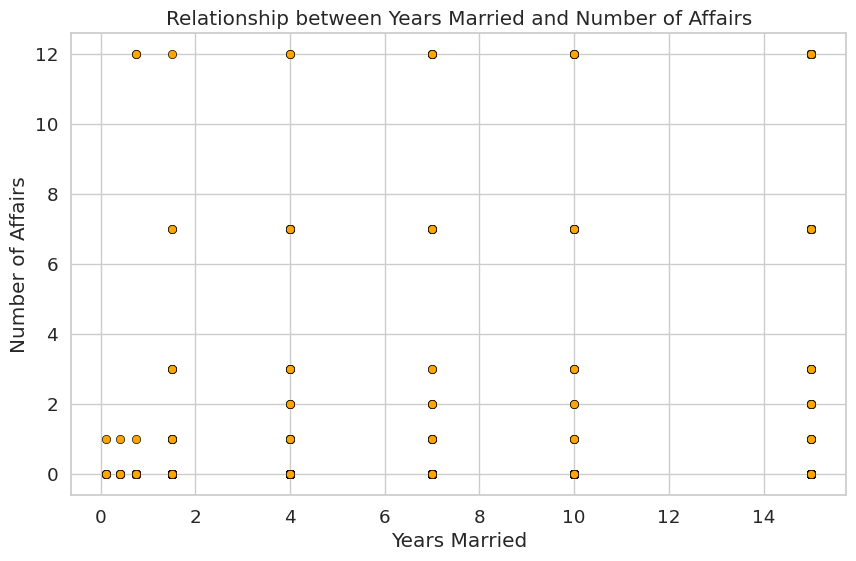

In [11]:
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='yearsmarried', y='affairs', data=df, edgecolor='black', color='orange')
plt.title('Relationship between Years Married and Number of Affairs')
plt.xlabel('Years Married')
plt.ylabel('Number of Affairs')
plt.show()

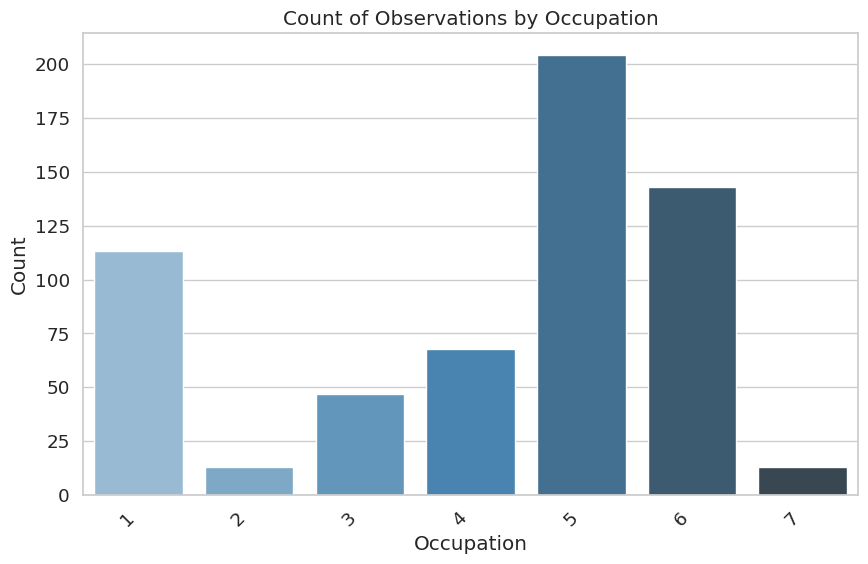

In [12]:
occupation_counts = df['occupation'].value_counts()
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='Blues_d')
plt.title('Count of Observations by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

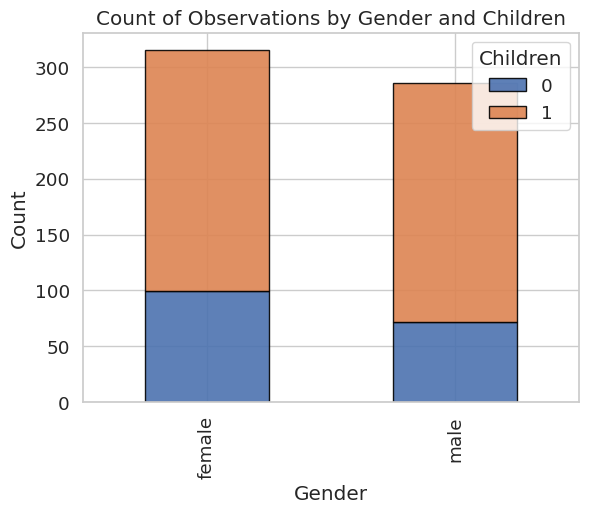

In [13]:
sns.set(style='whitegrid', font_scale=1.2)
gender_children_counts = df.groupby(['gender', 'children']).size().unstack()
ax = gender_children_counts.plot(kind='bar', stacked=True, edgecolor='black', alpha=0.9)
ax.set_title('Count of Observations by Gender and Children')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
plt.legend(title='Children', loc='upper right')
plt.show()

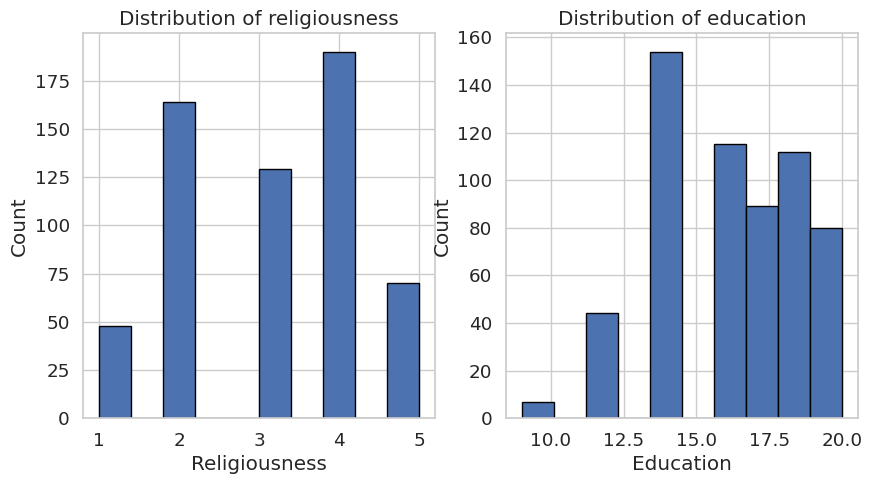

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
df['religiousness'].plot(kind='hist', ax=axs[0], edgecolor='black')
axs[0].set_title('Distribution of religiousness')
axs[0].set_xlabel('Religiousness')
axs[0].set_ylabel('Count')
df['education'].plot(kind='hist', ax=axs[1], edgecolor='black')
axs[1].set_title('Distribution of education')
axs[1].set_xlabel('Education')
axs[1].set_ylabel('Count')
plt.show()